In [1]:
import torch

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

from torchvision import datasets
from torchvision import transforms 
from torchvision.transforms import ToTensor
transform = transforms.Compose([transforms.RandomRotation(30),
                       transforms.ToTensor()])
train_data = datasets.MNIST(
    root = 'data', train = True, transform = ToTensor(), download = True,            
)
test_data = datasets.MNIST(
    root = 'data', train = False, transform = ToTensor()
)

cuda


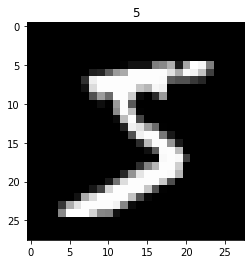

In [2]:
import matplotlib.pyplot as plt
plt.imshow(train_data.data[0], cmap='gray')
plt.title('%i' % train_data.targets[0])
plt.show()

In [3]:
loaders = {
    'train' : torch.utils.data.DataLoader(train_data, 
                                          batch_size=128, 
                                          shuffle=True, 
                                          num_workers=1),
    
    'test'  : torch.utils.data.DataLoader(test_data, 
                                          batch_size=128, 
                                          shuffle=True, 
                                          num_workers=1),
}

In [4]:
import torch.nn as nn
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Sequential(         
            nn.Conv2d(
                in_channels=1,              
                out_channels=16,            
                kernel_size=5,              
                stride=1,                   
                padding=2,                  
            ),                              
            nn.ReLU(),                      
            nn.MaxPool2d(kernel_size=2),    
        )
        self.conv2 = nn.Sequential(         
            nn.Conv2d(16, 32, 5, 1, 2),     
            nn.ReLU(),                      
            nn.MaxPool2d(2),                
        )
        self.out = nn.Linear(32 * 7 * 7, 10)
    def forward(self, x):
        x = self.conv1(x)
        x = self.conv2(x)
        x = x.view(x.size(0), -1)       
        output = self.out(x)
        return output, x    

In [5]:
cnn = CNN()
print(cnn)

loss_func = nn.CrossEntropyLoss() 

CNN(
  (conv1): Sequential(
    (0): Conv2d(1, 16, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv2): Sequential(
    (0): Conv2d(16, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (out): Linear(in_features=1568, out_features=10, bias=True)
)


In [6]:
from torch import optim
optimizer = optim.Adam(cnn.parameters(), lr = 0.01) 
#from torch.autograd import Variable
num_epochs = 10
def train(num_epochs, cnn, loaders):
    
    cnn.train()
        
    total_step = len(loaders['train'])
        
    for epoch in range(num_epochs):
        for i, (images, labels) in enumerate(loaders['train']):
                 
            output = cnn(images)[0] 
            loss = loss_func(output, labels)
              
            optimizer.zero_grad()           
            
            loss.backward()    
            
            optimizer.step()                
            
            if (i+1) % 100 == 0:
                print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}' 
                       .format(epoch + 1, num_epochs, i + 1, total_step, loss.item()))
            pass
        
        pass
    
    
    pass
train(num_epochs, cnn, loaders)

Epoch [1/10], Step [100/469], Loss: 0.0559
Epoch [1/10], Step [200/469], Loss: 0.0830
Epoch [1/10], Step [300/469], Loss: 0.0237
Epoch [1/10], Step [400/469], Loss: 0.0207
Epoch [2/10], Step [100/469], Loss: 0.1022
Epoch [2/10], Step [200/469], Loss: 0.0754
Epoch [2/10], Step [300/469], Loss: 0.0775
Epoch [2/10], Step [400/469], Loss: 0.0631
Epoch [3/10], Step [100/469], Loss: 0.0450
Epoch [3/10], Step [200/469], Loss: 0.0330
Epoch [3/10], Step [300/469], Loss: 0.0100
Epoch [3/10], Step [400/469], Loss: 0.0402
Epoch [4/10], Step [100/469], Loss: 0.0063
Epoch [4/10], Step [200/469], Loss: 0.0238
Epoch [4/10], Step [300/469], Loss: 0.0673
Epoch [4/10], Step [400/469], Loss: 0.0750
Epoch [5/10], Step [100/469], Loss: 0.0405
Epoch [5/10], Step [200/469], Loss: 0.0325
Epoch [5/10], Step [300/469], Loss: 0.0489
Epoch [5/10], Step [400/469], Loss: 0.0088
Epoch [6/10], Step [100/469], Loss: 0.0088
Epoch [6/10], Step [200/469], Loss: 0.0287
Epoch [6/10], Step [300/469], Loss: 0.0411
Epoch [6/10